In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from models.kwpwridge import *
from models.linear_tree import *

import pyreadr

result = pyreadr.read_r('data/berkeley.rda')
data = result['berkeley']
data = data.dropna(subset=["weight", "age"])
data.head(10)

,id,age,weight,height,stem.length,bi.acromial,bi.iliac,leg.circ,strength,sex
0,201,0.00,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1
1,201,0.25,7.4,NaN,NaN,NaN,NaN,NaN,NaN,1
2,201,0.50,8.7,NaN,NaN,NaN,NaN,NaN,NaN,1
3,201,0.75,9.5,NaN,NaN,NaN,NaN,NaN,NaN,1
4,201,1.00,10.3,NaN,NaN,NaN,NaN,NaN,NaN,1
5,201,1.25,11.1,NaN,NaN,NaN,NaN,NaN,NaN,1
6,201,1.50,11.8,NaN,NaN,NaN,NaN,NaN,NaN,1
7,201,1.75,12.5,87.0,NaN,NaN,NaN,NaN,NaN,1
8,201,2.00,13.6,90.2,NaN,NaN,NaN,NaN,NaN,1
9,201,3.00,15.9,97.8,NaN,NaN,NaN,NaN,NaN,1


In [2]:
data

,id,age,weight,height,stem.length,bi.acromial,bi.iliac,leg.circ,strength,sex
0,201,0.00,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1
1,201,0.25,7.4,NaN,NaN,NaN,NaN,NaN,NaN,1
2,201,0.50,8.7,NaN,NaN,NaN,NaN,NaN,NaN,1
3,201,0.75,9.5,NaN,NaN,NaN,NaN,NaN,NaN,1
4,201,1.00,10.3,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
4879,385,16.00,70.1,168.5,86.6,36.6,29.2,39.9,128.0,2
4880,385,16.50,69.3,168.5,86.5,36.9,29.0,39.8,139.0,2
4881,385,17.00,67.8,168.6,86.7,36.9,28.9,39.4,142.0,2
4882,385,17.50,66.1,168.9,86.9,36.7,28.9,38.8,144.0,2


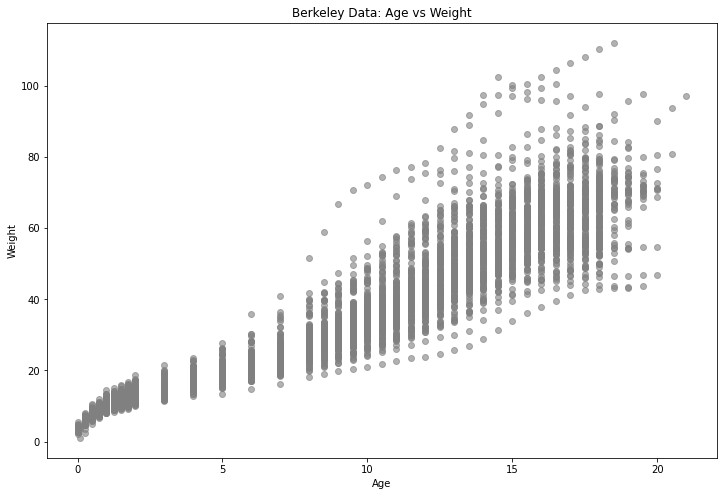

In [3]:
X = data['age'].to_numpy()
y = data['weight'].to_numpy()

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='grey', label='Data', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Berkeley Data: Age vs Weight');

In [4]:
split_points = [2.5, 6, 11, 17]

model = kwPWRidgeRegressor(0.1)
lhs_lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 10000, depth_shrink=2)
hs_lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 10000, depth_shrink= 0)
lt = LinearTree(max_depth = 3, min_r2_gain = 0, alpha = 0.01, lam = 0, depth_shrink= 0)

In [5]:
model.fit(X, y, split_points)
lhs_lt.fit(X.reshape(-1, 1), y)
hs_lt.fit(X.reshape(-1, 1), y)
lt.fit(X.reshape(-1, 1), y)

(4875, 2) (4875, 1)
(4875, 2) (4875, 1)
(4875, 2) (4875, 1)


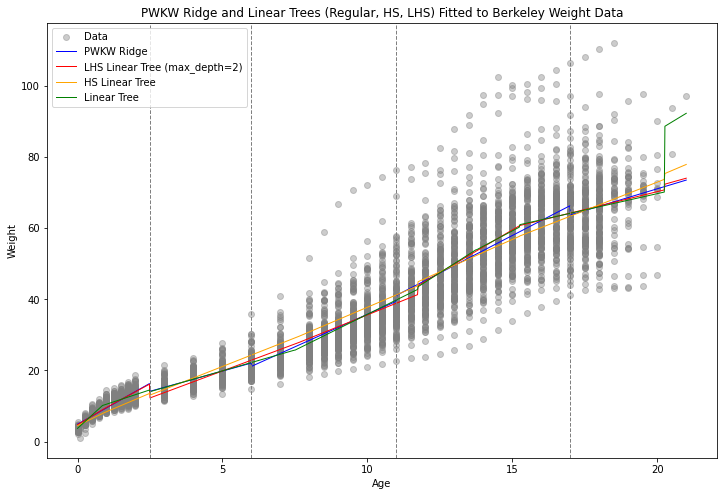

In [6]:
space = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='grey', label='Data', alpha=0.4)

plt.plot(space, model.predict(space.reshape(-1, )), color = 'blue', label='PWKW Ridge', linewidth=1)
plt.plot(space, lhs_lt.predict(space), color = 'red', label='LHS Linear Tree (max_depth=2)', linewidth=1)
plt.plot(space, hs_lt.predict(space), color = 'orange', label='HS Linear Tree', linewidth=1)
plt.plot(space, lt.predict(space), color = 'green', label='Linear Tree', linewidth=1)
for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.title('PWKW Ridge and Linear Trees (Regular, HS, LHS) Fitted to Berkeley Weight Data')
plt.savefig('figs/berkeley.png')
plt.show()

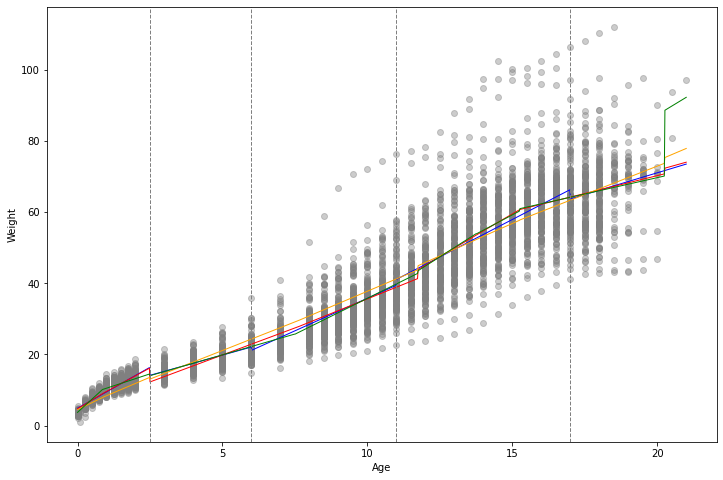

In [7]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='grey', label='Data', alpha=0.4)

plt.plot(space, model.predict(space.reshape(-1, )), color = 'blue', label='PWKW Ridge', linewidth=1)
plt.plot(space, lhs_lt.predict(space), color = 'red', label='LHS Linear Tree (max_depth=2)', linewidth=1)
plt.plot(space, hs_lt.predict(space), color = 'orange', label='HS Linear Tree', linewidth=1)
plt.plot(space, lt.predict(space), color = 'green', label='Linear Tree', linewidth=1)
for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Weight')
#plt.legend()
#plt.title('PWKW Ridge and Linear Trees (Regular, HS, LHS) Fitted to Berkeley Weight Data')
plt.savefig('figs/presentation_berkeley.png')
plt.show()

In [8]:
#Some Multi-D Performance Below

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [10]:
data = data.dropna(subset=["weight", "age", "leg.circ"])

chosen_columns = ["age", "leg.circ"]

In [11]:
X_md = data[chosen_columns].to_numpy()
y_md = data['weight'].to_numpy()

In [12]:
X_md.shape

(2896, 2)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_md, y_md, test_size=0.33, random_state=42)

In [14]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1940, 2), (956, 2), (1940, 1), (956, 1))

In [16]:
lhs_lt = LinearTree(max_depth = 4, min_r2_gain = 0, alpha = 0.1, lam = 500, depth_shrink=1)
hs_lt = LinearTree(max_depth = 4, min_r2_gain = 0, alpha = 0.1, lam = 500, depth_shrink=0)
lt = LinearTree(max_depth = 4, min_r2_gain = 0, alpha = 0.1, lam = 0, depth_shrink=0)
dt = DecisionTreeRegressor(max_depth = 4)
rf = RandomForestRegressor(max_depth = 4)
ridge = Ridge(alpha = 0.1)

In [17]:
lhs_lt.fit(X_train, y_train)
hs_lt.fit(X_train, y_train)
lt.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ridge.fit(X_train, y_train)

(1940, 3) (1940, 1)
(1940, 3) (1940, 1)
(1940, 3) (1940, 1)


/home/mattyshen/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Ridge(alpha=0.1)

In [18]:
print('Train R2')
print(f'DT R2: {np.round(r2_score(y_train, dt.predict(X_train)),3 )}')
print(f'RF R2: {np.round(r2_score(y_train, rf.predict(X_train)),3 )}'), 
print(f'Ridge R2: {np.round(r2_score(y_train, ridge.predict(X_train)),3 )}')
print(f'LT R2: {np.round(r2_score(y_train, lt.predict(X_train)),3 )}'), 
print(f'HS LT R2: {np.round(r2_score(y_train, hs_lt.predict(X_train)),3 )}')
print(f'LHS LT R2: {np.round(r2_score(y_train, lhs_lt.predict(X_train)),3 )}')

Train R2
DT R2: 0.903
RF R2: 0.917
Ridge R2: 0.911
LT R2: 0.925
HS LT R2: 0.923
LHS LT R2: 0.923


In [19]:
print('Test R2')
print(f'DT R2: {np.round(r2_score(y_test, dt.predict(X_test)),3 )}')
print(f'RF R2: {np.round(r2_score(y_test, rf.predict(X_test)),3 )}'), 
print(f'Ridge R2: {np.round(r2_score(y_test, ridge.predict(X_test)),3 )}')
print(f'LT R2: {np.round(r2_score(y_test, lt.predict(X_test)),3 )}'), 
print(f'HS LT R2: {np.round(r2_score(y_test, hs_lt.predict(X_test)),3 )}')
print(f'LHS LT R2: {np.round(r2_score(y_test, lhs_lt.predict(X_test)),3 )}')

Test R2
DT R2: 0.9
RF R2: 0.913
Ridge R2: 0.912
LT R2: 0.919
HS LT R2: 0.92
LHS LT R2: 0.92
